# Potential Selection

Here we test a couple different forcefield potentials to describe site energies:

Morse potential: $w(r) = D[1-\exp(-a(r_i - r_{eq}))^2 - D]$

Inverted Gaussian: $w(r) = -D \exp{-\frac{(r_i-0)^2}{2 \sigma^2}}$

The goal is a heavy tail and large range

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import il_pedagogical as ilp
from scipy.stats import skew
r = np.linspace(0, 2, 1000)
lattice_size = 200
T = 373
plt.rcParams.update({'font.size': 18})



## Inverted Gaussian potential
Uniform displacements

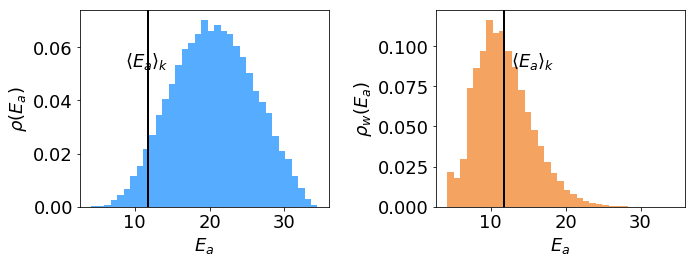

0.35
-0.012935113174960171
5.321643850382617
0.31650765473355286


In [83]:
D = 60.
gauss_pot_std = 0.9

displacement_type = 'uniform'
potential_type = 2
dissociation_type = 2
sigma = ilp.morse_std(r_eq, D, a, T)

delta = 0.35

lattice = ilp.make_quenched_disorder_lattice(lattice_size, delta, displacement_type, False)

Ads_E = ilp.adsorption_energies(lattice, dissociation_type, potential_type, D=D, std=gauss_pot_std, T=T).ravel() - 10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ilp.histogram(ax1, ax2, Ads_E, T)
plt.tight_layout()
plt.show()

print(delta)
print(skew(Ads_E))
print(np.std(Ads_E))

print(np.min(ilp.nearest_neighbor_distances(lattice)[1:-1,1:-1]))

Text(0, 0.5, '$w(\\hat{r}) + \\gamma D$, kJ/mol')

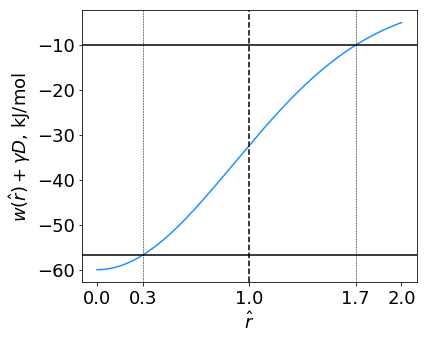

In [79]:
delta = 0.7
fig, ax = plt.subplots(1, 1, figsize=(6,5))
gamma = -0.

ax.plot(r, ilp.normal(r, D, 0, gauss_pot_std) - gamma * D, c='dodgerblue')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.plot([1., 1.],[ymin, ymax], c='k', linestyle='--')

ax.plot([1. - delta, 1. - delta],[ymin, ymax], c='k', linestyle='--', linewidth=0.5)
ax.plot([1. + delta, 1. + delta],[ymin, ymax], c='k', linestyle='--', linewidth=0.5)

lower = ilp.normal(1 - delta, D, 0, gauss_pot_std) - gamma * D
upper = ilp.normal(1 + delta, D, 0, gauss_pot_std) - gamma * D

ax.plot([xmin, xmax], [lower, lower], c='k')
ax.plot([xmin, xmax], [upper, upper], c='k')

extraticks = [1 - delta, 1 + delta]

ax.set_xticks([0, 1 - delta, 1, 1 + delta, 2])

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])


ax.set_xlabel(r'$\hat{r}$')
ax.set_ylabel(r'$w(\hat{r}) + \gamma D$, kJ/mol')

## Gaussian, Gaussian displacements

C:\Users\Craig\Desktop\repos\il-pedagogical\il_pedagogical.py:142: RuntimeWarning: divide by zero encountered in log
  adsorption_energies = 1 / B * np.asarray(np.log(np.sum(exp_V,axis=2))) -0.2*kwargs['D']


0.029995000221244045


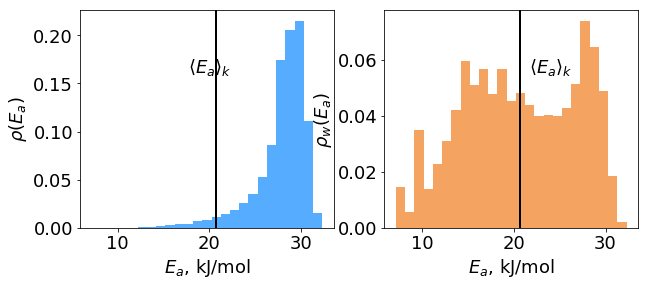

In [5]:
a = 30.
D = 35.
r_eq = 1.

displacement_type = 'uniform'
potential_type = 1
dissociation_type = 2

sigma = ilp.morse_std(r_eq, D, a, T)
r_eq = 1.0

delta = 1.75 * sigma

lattice = ilp.make_quenched_disorder_lattice(lattice_size, delta, displacement_type, False)
Ads_E = ilp.adsorption_energies(lattice, dissociation_type, potential_type, r_eq=r_eq, D=D, a=a, T=T).ravel()

plt.rcParams['figure.figsize'] = 10, 4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ilp.histogram(ax1, ax2, Ads_E, T, n_bins = 25)

print(delta)